# Reference Solution for Coding Assignment "Gradient Methods"

## 1. Preparation

In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from numpy import linalg as LA

## 2. Data

### 2.1 Dataset

In [2]:
# Import the weather measurements.
data = pd.read_csv('Assignment_MLBasicsData.csv')

# We consider each temperature measurement (=a row in dataframe data) 
# as a separate data point.
# Determine the total number of data points stored in csv file.
nrdatapoints = len(data)

# Print out the first data point (first row).
print("First data point:")
print(data.iloc[0])
print("\n******************************\n")

# Here is another data point. 
print("Another data point:")
print(data.iloc[13])
print("\n******************************\n")

# We use normalized values of 
# latitude, longitude, year, mon, day, hour, minute (as float values) 
# as features of a data point.
nrfeatures = 7 

# The code snippet below extracts the features of the first data point (first row in dataframe data).
date_object = datetime.strptime(data['Timestamp'].iloc[0], '%Y-%m-%d %H:%M:%S')

# Extract individual components.
latitude = data["Latitude"].iloc[0]
longitude = data["Longitude"].iloc[0]
year = float(date_object.year)
month = float(date_object.month)
day = float(date_object.day)
hour = float(date_object.hour)
minute = float(date_object.minute)

print("Unnormalized features of the first data point: ")
print(f"Latitude: {latitude}")
print(f"Longitude: {longitude}")
print(f"Year: {year}")
print(f"Month: {month}")
print(f"Day: {day}")
print(f"Hour: {hour}")
print(f"Minute: {minute}")
print("\n******************************\n")

# We choose the temperature as the label (quantity of interest) of a data point.
print("Label of first data point:", data["temp"].iloc[0])

First data point:
Unnamed: 0                              0
Latitude                         69.04277
Longitude                        20.85091
Timestamp             2023-12-31 18:00:00
temp                                -16.5
name          Enontekiö Kilpisjärvi Saana
Name: 0, dtype: object

******************************

Another data point:
Unnamed: 0                        13
Latitude                      69.757
Longitude                     27.012
Timestamp        2023-12-31 13:00:00
temp                           -26.3
name          Utsjoki Kevo Kevojärvi
Name: 13, dtype: object

******************************

Unnormalized features of the first data point: 
Latitude: 69.04277
Longitude: 20.85091
Year: 2023.0
Month: 12.0
Day: 31.0
Hour: 18.0
Minute: 0.0

******************************

Label of first data point :  -16.5


### 2.2 Features and labels

In [8]:
# We next build the feature matrix X (each of its rows hold the features of a data point) 
# and the label vector y (whose entries hold the labels of data points).
X = np.zeros((nrdatapoints, nrfeatures))
y = np.zeros((nrdatapoints, 1))

# Iterate over all rows in dataframe and create corresponding feature vector and label. 
for ind in data.index:
    # Latitude of FMI station, normalized by 100. 
    lat = float(data['Latitude'].iloc[ind]) / 100
    
    # Longitude of FMI station, normalized by 100.
    lon = float(data['Longitude'].iloc[ind]) / 100
    
    # Exctract the temperature value.
    tmp = data['temp'].iloc[ind]
    
    # Read the date and time of the temperature measurement.
    date_object = datetime.strptime(data['Timestamp'].iloc[ind], '%Y-%m-%d %H:%M:%S')

    # Extract year, month, day, hour, minute, and second. 
    # Normalize these values to ensure features are in range [0,1].
    year = float(date_object.year) / 2025
    month = float(date_object.month) / 13
    day = float(date_object.day) / 32
    hour = float(date_object.hour) / 25
    minute = float(date_object.minute) / 61
    
    # Store the data point's features and a label.
    X[ind,:] = [lat, lon, year, month, day, hour, minute]
    y[ind,:] = tmp

print(f"The created feature matrix contains {np.shape(X)[0]} entries of {np.shape(X)[1]} features each.")
print(f"The created label vector contains {np.shape(y)[0]} measurements.")

The created feature matrix contains 16469 entries of 7 features each.
The created label vector contains 16469 measurements.


### 2.3 Training and validation sets

In [4]:
# Define the number of data points used for training set.
trainsize = 100

# Split the dataset into training and validation set. 
Xtrain = X[:trainsize,:] 
Xval = X[trainsize:] 
ytrain = y[:trainsize] 
yval = y[trainsize:] 

print(f"The training set consists of {np.shape(Xtrain)[0]} data points.")
print(f"The validation set consists of {np.shape(Xval)[0]} data points.")

The training set consists of 100 data points.
The validation set consists of 16369 data points.


## 3. Model

### 3.1 Ridge regression - Scikit-learn class

In [5]:
# Define the regularization parameter.
regparam = 0.01

# Create a ridge regression using scikit-learn class.
ridge = Ridge(alpha=(trainsize*regparam), fit_intercept=False )

# Train the linear model, i.e., 
# solve the ERM to obtain parameters of the linear model.
ridge.fit(Xtrain, ytrain)
Etrain = mean_squared_error(ytrain, ridge.predict(Xtrain))
Eval = mean_squared_error(yval, ridge.predict(Xval))

print("********** Ridge Regression Diagnosis **********")
print("Training error: ", Etrain)
print("Validation error: ", Eval)

********** Ridge Regression Diagnosis **********
Training error:  34.48452921511405
Validation error:  41.20962591358468


### 3.2 Student task #1 - Ridge regression by gradient descent


********** GD Ridge Regression Diagnosis **********
Training error: 34.714123131613945
Validation error: 41.48345177228171


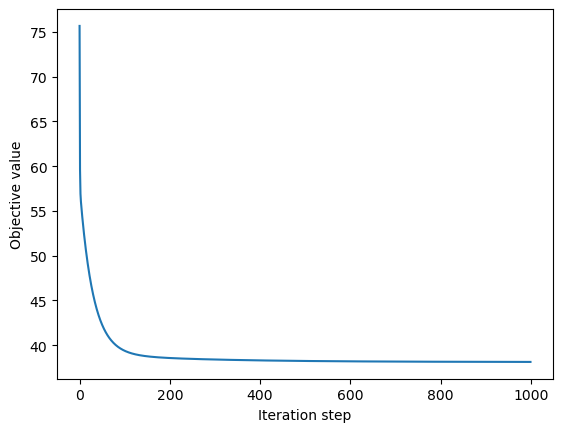

In [6]:
# Define the initial parameters.
N_iters = 1000 # The number of gradient steps.
lrate = 0.1 # Learning rate
ridge_alpha = regparam # Regularization parameter

# Define the storages. 
weights = np.zeros((nrfeatures, 1)) # Current weights.
log_gradient = np.zeros((N_iters, 1)) # The log of gradients.
log_objective = np.zeros((N_iters, 1)) # The log of the objective function values.

# Algorithm 2
for iter_GD in range(N_iters): 
    gradient = -(2 / trainsize) * Xtrain.T.dot(ytrain - Xtrain.dot(weights)) + 2 * ridge_alpha * weights
    weights -=  lrate * gradient
    log_gradient[iter_GD] = LA.norm(gradient)
    log_objective[iter_GD] = mean_squared_error(ytrain, Xtrain.dot(weights)) + ridge_alpha * np.sum(weights ** 2)
    
plt.plot(range(N_iters), log_objective)
plt.xlabel("Iteration step")
plt.ylabel("Objective value")

print("\n********** GD Ridge Regression Diagnosis **********")
print("Training error:", mean_squared_error(ytrain, Xtrain.dot(weights)) )
print("Validation error:", mean_squared_error(yval, Xval.dot(weights)))

### 3.3 Student task #2 - The optimal learning rate

In [11]:
# Define the initial parameters.
tol = 1e-10 # The tolerance
lrates = np.linspace(0.28, 0.32, 20) # Learning rate
ridge_alpha = regparam # Regularization parameter

# Define the storages. 
best_objective = float('inf') # The best value of the objective function.
best_weights = 0 # The weights for which the value of the objective function is the smallest.
best_lrate = 0 # The learning rate for which the value of the objective function is the smallest.

# We use this numpy array to store, for each choice of lrate, the number 
# of iterations required to achieve a sufficiently small decrease of a GD step.

nriters = np.zeros((len(lrates),1))

# Iterate over list of values for the learning rate.
for iter_lrate in range(len(lrates)):
    lrate = lrates[iter_lrate]
    N_iter = 0 # Store the number of GD steps
    weights = np.zeros((nrfeatures, 1)) # Current weights.
    objective_curr = 1e10 # The current value of the objective function.
    objective_next =  1e5 # The next value of the objective function.
    log_objective = np.array([])
    # the following loop implments GD Algorithm 1
    while (N_iter < 5000) and (np.abs(objective_curr - objective_next) > tol): 
        objective_curr = objective_next
        gradient = -(2 / trainsize) * Xtrain.T.dot(ytrain - Xtrain.dot(weights)) + 2 * ridge_alpha * weights
        weights -=  lrate * gradient
        objective_next =  mean_squared_error(ytrain, Xtrain.dot(weights)) + ridge_alpha * np.sum(weights ** 2)
        N_iter += 1
        log_objective = np.append(log_objective, objective_next)
    nriters[iter_lrate] = N_iter 
    
    # plt.plot(range(N_iter), log_objective)
    # plt.title(lrate)
    # plt.xlabel("Iteration step")
    # plt.ylabel("Objective value")
    # plt.show()
    print(f"The learning rate: {lrate}\nThe number of iterations: {N_iter}\nThe objective value: {objective_curr}\n")

min_idx = np.argmin(nriters)     
min_nriters = int(nriters[min_idx][0])
best_lrate = lrates[min_idx]
    
print("********** GD Ridge Regression Diagnosis **********")
print(f"The optimal hyperparameters:\nThe learning rate: {best_lrate}\nNumber of ierations: {min_nriters}\n")

The learning rate: 0.28
The number of iterations: 1567
The objective value: 38.12430754453986

The learning rate: 0.28210526315789475
The number of iterations: 1556
The objective value: 38.124307544467776

The learning rate: 0.2842105263157895
The number of iterations: 1545
The objective value: 38.12430754441253

The learning rate: 0.28631578947368425
The number of iterations: 1534
The objective value: 38.124307544373785

The learning rate: 0.28842105263157897
The number of iterations: 1523
The objective value: 38.124307544351296

The learning rate: 0.2905263157894737
The number of iterations: 1513
The objective value: 38.124307544244616

The learning rate: 0.29263157894736846
The number of iterations: 1502
The objective value: 38.12430754425354

The learning rate: 0.2947368421052632
The number of iterations: 1492
The objective value: 38.12430754417744

The learning rate: 0.2968421052631579
The number of iterations: 1482
The objective value: 38.124307544116284

The learning rate: 0.298